**importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import seaborn as sns

In [94]:
data = pd.read_csv('hepatitis_csv.csv')
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [95]:
print('Shape of Data',data.shape)

Shape of Data (155, 20)


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
age                155 non-null int64
sex                155 non-null object
steroid            154 non-null object
antivirals         155 non-null bool
fatigue            154 non-null object
malaise            154 non-null object
anorexia           154 non-null object
liver_big          145 non-null object
liver_firm         144 non-null object
spleen_palpable    150 non-null object
spiders            150 non-null object
ascites            150 non-null object
varices            150 non-null object
bilirubin          149 non-null float64
alk_phosphate      126 non-null float64
sgot               151 non-null float64
albumin            139 non-null float64
protime            88 non-null float64
histology          155 non-null bool
class              155 non-null object
dtypes: bool(2), float64(5), int64(1), object(12)
memory usage: 22.2+ KB


In [97]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In the feature bilirubin quantile 75 is 1.5 and max value is 8.0 ==> there might be outliers in the feature and similarly the features sgot and alk_phosphate might contain outliers

In [98]:
# checking for null values 
data.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

There null values in the features as we can see above which have to be handled

In [99]:
data['class'].unique()

array(['live', 'die'], dtype=object)

we can consider that 'class' is the target column which indiated wheteher the hepatitis is alive or dead in a patient

EDA for numerical features

Minimum age of the patient  7
Maximum age of the patient  78
Average age of the patient  41.2


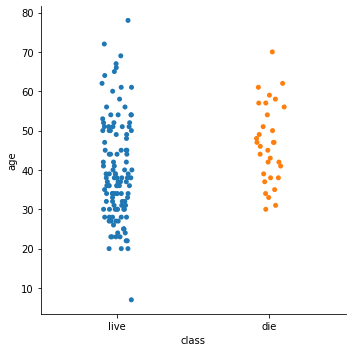

In [100]:
# let's see what effect does the age of the patient has on the survival of the virus
print('Minimum age of the patient ',data.age.min())
print('Maximum age of the patient ',data.age.max())
print('Average age of the patient ',data.age.mean())

sns.catplot(x='class', y='age', data=data);

* we see that hepatitis is alive in a patient of age 7, which might be a outlier
* we also see that virus is more prevlent in middle age group patients

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


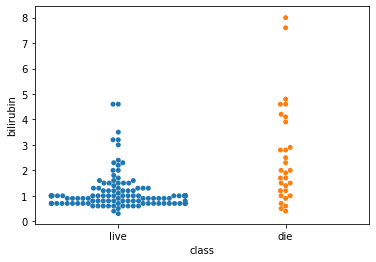

In [101]:
# variation of survial of the virus with bilirubin
sns.swarmplot(x='class', y='bilirubin', data=data);

* We observe that virus is more alive when the levels of bilirubin are low

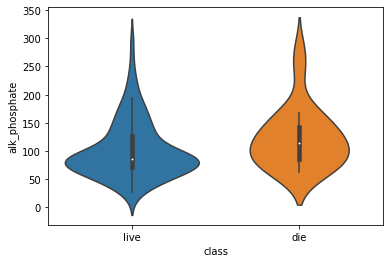

In [102]:
# variation of survial of the virus with alk_phosphate
sns.violinplot(x='class', y='alk_phosphate', data=data);

* More number of 'live' class virus are from patients whose alk_sulpahte levels are between 50-100

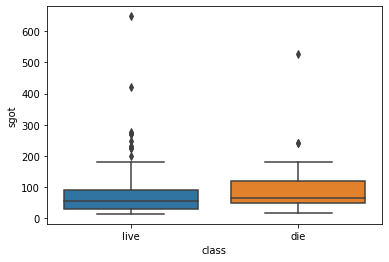

In [103]:
# variation of survial of the virus with alk_phosphate
sns.boxplot(x='class', y='sgot', data=data);

* most 'live' class are present in patinents in patinents whose sgot levls are around 50
* there are many outliers present in sgot features as we can see from box plot

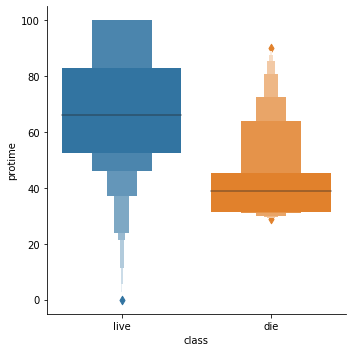

In [104]:
# variation of survial of the virus with alk_phosphate
sns.catplot(x='class', y='protime', data=data, kind = 'boxen');

* if the protime is high more chances of virus to be alive and vice versa

In [105]:
# let's see the distribution of survival with respect to sex of the patient
pd.crosstab(data['sex'],data['class'])

class,die,live
sex,,
female,32,107
male,0,16


In [106]:
data['sex'].value_counts()

female    139
male       16
Name: sex, dtype: int64

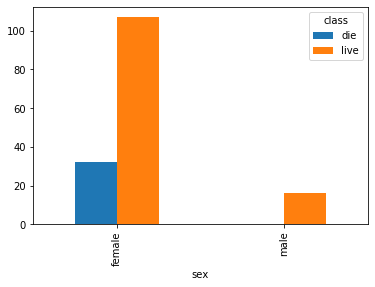

In [107]:
pd.crosstab(data['sex'],data['class']).plot.bar();

* we see that there are only 16 male patients 
* In majority of patients the virus is alive

In [108]:
# lets check the averge age of males and females

np.round(data.groupby('sex')['age'].mean(),2)

sex
female    41.17
male      41.50
Name: age, dtype: float64

The average ages of males and females are almost similar

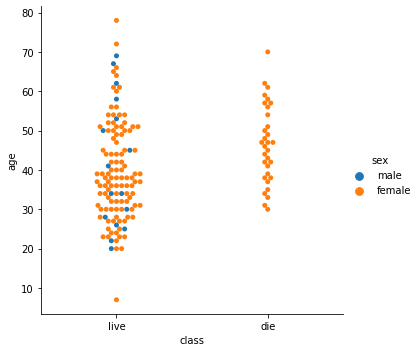

In [109]:
# distribution of class with respect to age and sex
sns.catplot('class','age',hue='sex', data=data, kind = 'swarm');

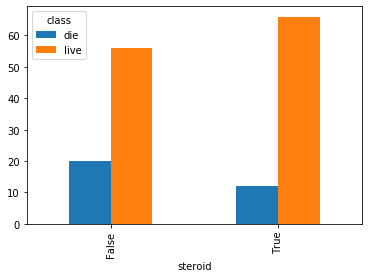

In [110]:
# let's see the distribution of survival with respect to steroid of the patient
pd.crosstab(data['steroid'],data['class']).plot.bar();

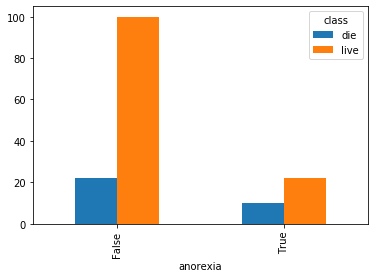

In [111]:
# let's see the distribution of survival with respect to anorxia
pd.crosstab(data['anorexia'],data['class']).plot.bar();

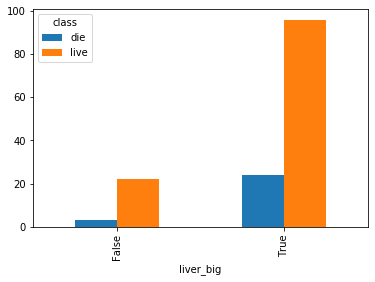

In [112]:
# let's see the distribution of survival with respect to liver_big
pd.crosstab(data['liver_big'],data['class']).plot.bar();

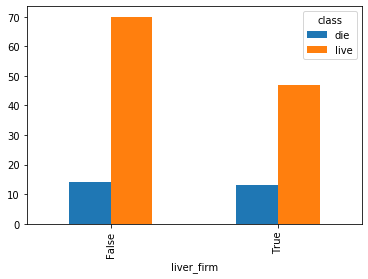

In [113]:
# let's see the distribution of survival with respect to liver_firm
pd.crosstab(data['liver_firm'],data['class']).plot.bar();

from the above three plota we see that marity of the patients does not have anorexia, does not have liver_big but have a liver_firm

liver secrets bilirubin , lets check how class is vaied with the properties of the liver

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


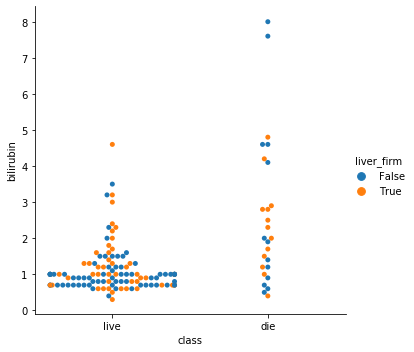

In [114]:
# distribution of class with respect to bilirubin and liver_firm
sns.catplot('class','bilirubin',hue='liver_firm', data=data, kind = 'swarm');

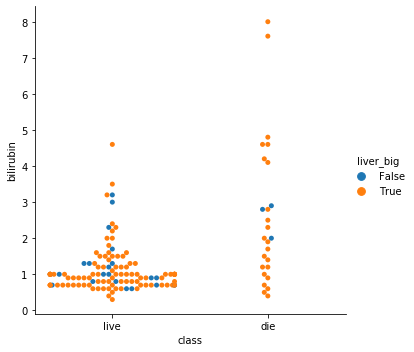

In [115]:
# distribution of class with respect to bilirubin and liver_big
sns.catplot('class','bilirubin',hue='liver_big', data=data, kind = 'swarm');

bilirubin levels might be one of the important in predicting the class of the virus, as we see clearly that low levels of bilirubin are the cases with more 'live' class

How does having fatigue effect hepatitis?

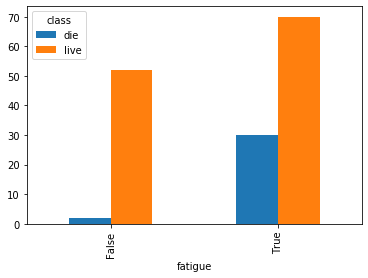

In [116]:
# let's see the distribution of survival with respect to fatigue
pd.crosstab(data['fatigue'],data['class']).plot.bar();

seems like having fatigue does have a impact on the survival of the virus, but we cannot take this visualization for granted

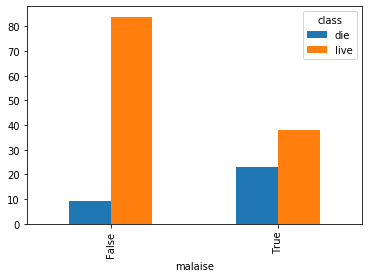

In [117]:
# let's see the distribution of survival with respect to malaise
pd.crosstab(data['malaise'],data['class']).plot.bar();

Again can't say anything about malaise from this plot

Let's check for correlation

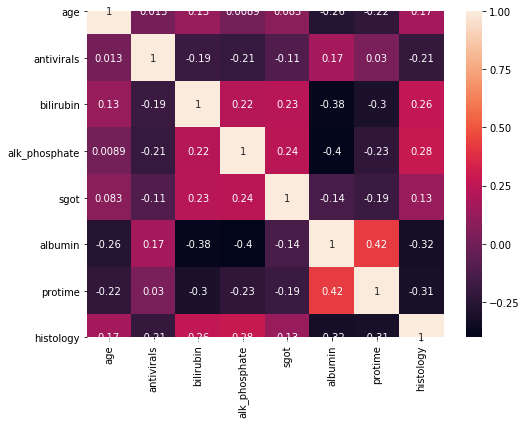

In [118]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot=True);

In [119]:
# Checking for null value in steroid feature
data[data['steroid'].isna()]

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live


In [120]:
# Imputing mising value by mode
most_freq = data['steroid'].mode()[0]
data['steroid'].fillna(most_freq, inplace=True)

In [121]:
# lets check for fatigue
data[data['fatigue'].isna()]

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
56,34,female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,live


In [122]:
# This data point has many null values, it does not give any useful informatiom, deleting the row
data  = data.drop([56])

In [123]:
# resetting the index
data = data.reset_index()

In [124]:
# checking for spleen_palpable
data[data['spleen_palpable'].isna()]

,index,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
41,41,23,female,True,False,False,False,False,NaN,NaN,...,NaN,NaN,NaN,4.6,56.0,16.0,4.6,NaN,False,live
71,72,51,female,True,False,True,True,True,NaN,NaN,...,NaN,NaN,NaN,0.9,76.0,271.0,4.4,NaN,False,live
82,83,67,male,False,False,True,True,False,True,False,...,NaN,NaN,NaN,1.5,179.0,69.0,2.9,NaN,False,live
146,147,70,female,False,False,True,True,True,NaN,NaN,...,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die


In [125]:
# filling with mode for spleen_palpable,liver_firm, liver_big, spiders,ascites,varices

most_freq = data['spleen_palpable'].mode()[0]
data['spleen_palpable'].fillna(most_freq, inplace=True)

most_freq = data['liver_firm'].mode()[0]
data['liver_firm'].fillna(most_freq, inplace=True)

most_freq = data['liver_big'].mode()[0]
data['liver_big'].fillna(most_freq, inplace=True)


most_freq = data['spiders'].mode()[0]
data['spiders'].fillna(most_freq, inplace=True)


most_freq = data['ascites'].mode()[0]
data['ascites'].fillna(most_freq, inplace=True)


most_freq = data['varices'].mode()[0]
data['varices'].fillna(most_freq, inplace=True)

In [126]:
# imputing with mean for bilirubin, alk_phosphate ,sgot, albumin

data['bilirubin'].fillna(data['bilirubin'].mean(), inplace=True)

data['alk_phosphate'].fillna(data['alk_phosphate'].mean(), inplace=True)

data['sgot'].fillna(data['sgot'].mean(), inplace=True)

data['albumin'].fillna(data['albumin'].mean(), inplace=True)

In [127]:
# filling protime with median
data['protime'].fillna(data['protime'].median(), inplace=True)

In [128]:
# checking for null values
data.isna().sum()

index              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64